<a href="https://colab.research.google.com/github/kallylopes/scikit-zero/blob/master/scikit_multi_layer_perceptron_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-layer perceptron

---



Before we start introducing the multi-layer perceptron, we need first to talk very briefly about Artificial Neural Networks (ANN) to understand better all the concepts. Artificial Neural Networks is computing system designed to imitate how the human nervous system works, based specifically on the central element, the neuron.

The neuron has the ability to process the input informations received from sensory organs, process this informations, and then decide what to do in reaction to the input. The neuron has three main parts: dendrites, nucleus and axons. The first one is responsible to receive the input data, while the second one is in charge of processing the information and the third one is responsible to transport the output of the neuron to the dendrites of another neuron.


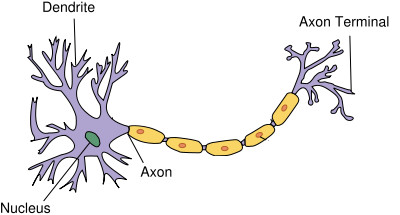

The perceptron is the basic representation of the human neuron and it has essentially a input layer, an activation function and a single output, where the input layer acts like the dendrites and it is responsible for the input information. while the activation function resembles the nucleus of human nervous system neuron. The input entries are multiplied by corresponding weights, which are typically initialized with some random value, after that the results are added together. Based on this result, the activation function processes the information and yields an output. 

A multi-layer perceptron has all these attributes previously commented and also has one or more hidden layer, which are useful when we want to solve complicated problems, especially problems that are not linearly separable. These layers are called "hidden" because we can not see them from the input ou output of the system.

As we will see over the tutorial, the multi-layer perceptron can learn a non-linear function approximator for either classification or regression scenario.

## Data preparation

First of all, we have to import all the libraries that will be nedded to execute the details of multi-layer perceptron. 

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score
import pandas as pd

To execute this tutorial, you need previously to download the file "wine.data" in this [link](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/), rename it to "wine_data.csv" and upload to the Google Colaboratory environment.

In [ ]:
#importing the dataset
data = pd.read_csv("wine_data.csv", names = ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"], sep=",")
data.head()

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


We have to delete in the dataset all of the entries that are duplicated and/or have null values to avoid that our model become skewed.

In [ ]:
#removing duplicated entries
data.drop_duplicates()

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
#removing null entries
data.dropna()

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Classification

Starting with the classification scenario, first of all we need to split the dataset in the test and training dataset, to be able to achieve this goal we will distinct the target that we want to predict from the rest of the data. In the split method we are specifying the data and the random state, which simply define a seed to the random generator in order to the train-test split be always deterministic. 

In [ ]:
y = data.Cultivator
data = data.drop('Cultivator',axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, y, random_state=1)

It is a good pratice to scale the data that we will use before do any prediction in order to be albe to evaluate all the features uniformly, thus increasing the performance of the algorithm. 

In [ ]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Next we will create the model to predict the data, there are a lot of parameters that we can specify in this process, but we will only define the hidden layer size by passing a tuple containing the number of neurons we want at each layer, the random state, which sets the randon generator, and the maximum iterations, that defines the maximum number of iterations the algorithm will execute if it do not converge. There are not a precise formula to calculate the number of layers and nodes, the best way is to try systematic experimentation to discover what works best for the model.

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter=500, random_state=1).fit(X_trainscaled, y_train)

Finally we will do the predict and print the score, which tells us the porcentage of correct predictions.

In [ ]:
y_pred=clf.predict(X_test)
print("The score is", clf.score(X_test, y_test))

The score is 0.9777777777777777


## Regression

In the regression scenario, we will use a different dataset because we need a continuous value as a target to be able to apply the regression. Therefore, in the cell bellow we fetch a famous dataset about California housing price that already is integrated to the scikit library.

In [ ]:
cal_housing = fetch_california_housing()

After that, to be able to do the split process, we need to separate the data and the target that we want to predict in two different variables.

In [ ]:
X = pd.DataFrame(cal_housing.data,columns=cal_housing.feature_names)
y = cal_housing.target

Next we will split the data in the training and test dataset, like we did previously in the classification scenario. Here we are also specifying the size of the test set equal to 20%. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now we need to do the process of feature scaling before we start any prediction. Like we said before, the feature scaling allow us to evaluate all the features uniformly and that can increase significantly the performance of some machine learning algorithms.

In [ ]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

Thereafter we will create the model specifying again the size of the hidden layer, the random state e the maximum iterations.

In [ ]:
reg = MLPRegressor(hidden_layer_sizes=(64,64,64),random_state=1, max_iter=2000)
reg = reg.fit(X_trainscaled, y_train)

Finally in the cell bellow we will do the prediction and verify the score of the algorithm.

In [ ]:
y_pred=reg.predict(X_test)
print("The Score is ", (r2_score(y_pred, y_test)))

The Score is  0.7304111477349684


#Reference

[Introduction to Neural Networks with Scikit-Learn](https://stackabuse.com/introduction-to-neural-networks-with-scikit-learn/)

[Feature Scaling for Machine Learning: Understanding the Difference Between Normalization vs. Standardization](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)

[How to Configure the Number of Layers and Nodes in a Neural Network](https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/)

[Deep Neural Multilayer Perceptron (MLP) with Scikit-learn](https://towardsdatascience.com/deep-neural-multilayer-perceptron-mlp-with-scikit-learn-2698e77155e)

[1.17. Neural network models (supervised)](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)

[A Beginner’s Guide to Neural Networks in Python](https://www.springboard.com/blog/beginners-guide-neural-network-in-python-scikit-learn-0-18/)
